### 1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets)

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [2]:
print(boston.data.shape)

(506, 13)


In [16]:
bst = pd.DataFrame(boston.data)
bst.columns = boston.feature_names
bst['PRICE'] = boston.target

bst.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<hr>

### 2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff!

In [4]:
# imports
import numpy as np
import seaborn as sns
import cufflinks as cf
# pip3 install cufflinks
# pip3 install chart_studio

cf.go_offline() # tells cufflinks we will be charting plots offline

bst.iplot()

In [5]:
bst.iplot(mode="markers", size=5)

In [6]:
print(boston.DESCR)
# https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

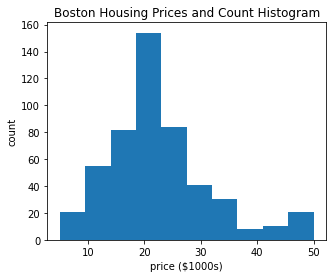

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
plt.hist(boston.target)
plt.title('Boston Housing Prices and Count Histogram')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

# https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/

<hr>

### 3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

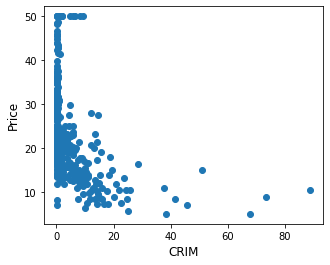

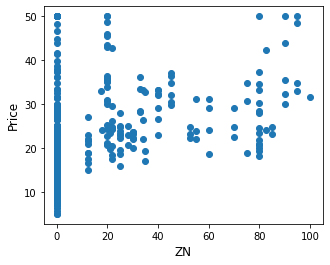

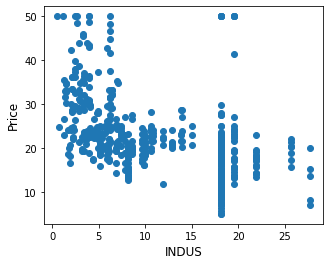

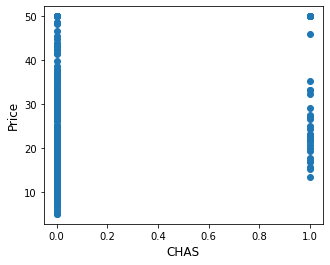

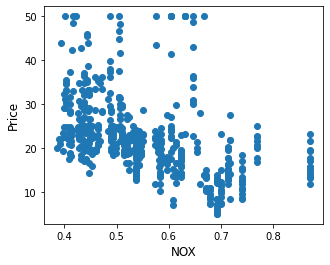

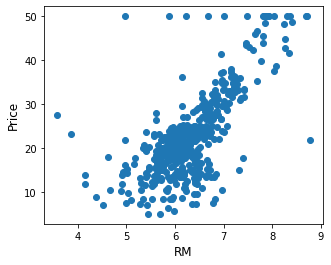

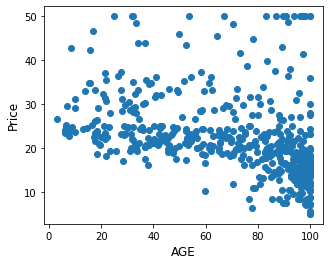

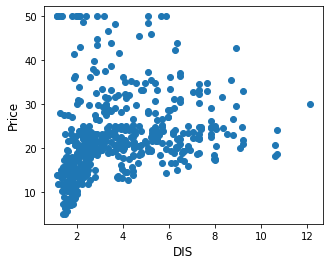

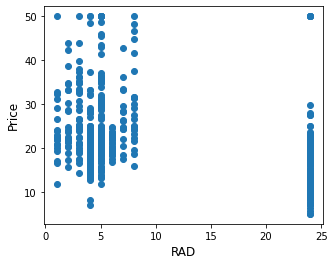

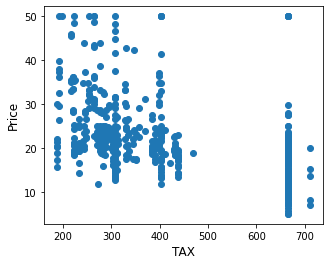

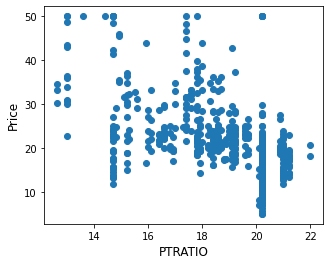

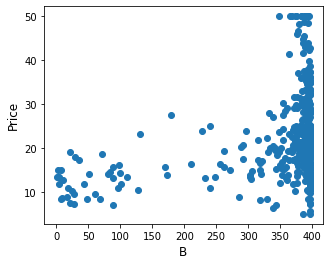

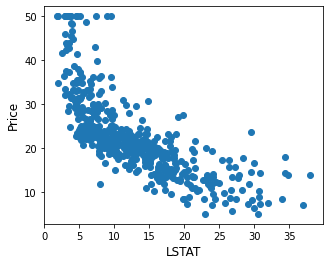

In [5]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()
    
    # https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/

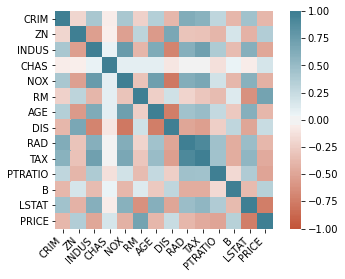

In [10]:
corr = bst.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap = sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment='right'
);

# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

<hr>

### 4- Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.

In [11]:
print(len(bst))

506


In [26]:
feature_cols = bst.columns[:-1]

In [29]:
bst[feature_cols].to_numpy()

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [43]:
from sklearn.model_selection import train_test_split


X = bst[feature_cols].to_numpy()
y = bst["PRICE"].to_numpy()
# always seperate features from target before splitting

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# x is feature data and y is target
# capital X represents matrix

x_train.shape



(379, 13)

<hr>

### 5 -Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.


In [44]:
# Define the model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Train/Fit the model - finds line of best fit
lin_reg.fit(x_train, y_train)

# Evaluate the model - MSE, r^2


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
lin_reg.intercept_

36.93325545712031

In [46]:
x_test[2]
y_test[2]

23.0

In [47]:
lin_reg.predict([x_test[2]])

array([29.20588553])

In [48]:
y_pred = lin_reg.predict(x_test)

In [55]:
y_pred


array([24.95233283, 23.61699724, 29.20588553, 11.96070515, 21.33362042,
       19.46954895, 20.42228421, 21.52044058, 18.98954101, 19.950983  ,
        4.92468244, 16.09694058, 16.93599574,  5.33508402, 39.84434398,
       32.33549843, 22.32772572, 36.54017819, 31.03300611, 23.32172503,
       24.92086498, 24.26106474, 20.71504422, 30.45072552, 22.45009234,
        9.87470006, 17.70324412, 17.974775  , 35.69932012, 20.7940972 ,
       18.10554174, 17.68317865, 19.71354713, 23.79693873, 29.06528958,
       19.23738284, 10.97815878, 24.56199978, 17.32913052, 15.20340817,
       26.09337458, 20.87706795, 22.26187518, 15.32582693, 22.85847963,
       25.08887173, 19.74138819, 22.70744911,  9.66708558, 24.46175926,
       20.72654169, 17.52545047, 24.45596997, 30.10668865, 13.31250981,
       21.52052342, 20.65642932, 15.34285652, 13.7741129 , 22.07429287,
       17.53293957, 21.60707766, 32.91050188, 31.32796114, 17.64346364,
       32.69909854, 18.56579207, 19.32110821, 18.81256692, 23.04

In [56]:
y_test


array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8, 26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4,
       41.3, 17.2, 27.1, 20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5,
       12.3, 19.4, 21.2, 20.3, 18.8, 33.4])

<hr>

### 6- Compute, Mean-Square-Error (MSE) and R Squared score of your Model

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse: {mse}")
r2

mse: 29.78224509230252


0.635463843320211

### Apply data normalization (Scaling) to improve the prediction result¶
- Use StandardScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got
- Use MinMaxScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got
- Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

In [10]:
# Imports

from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import time


In [11]:
# helper functions

def timer(f):
    start = time.time()
    res = f()
    end = time.time()
    print("fitting: {}".format(end - start))
    return res

def build_model_for_data(data, target):
    pipeline = make_pipeline(Linear_Regression())
    model = timer(lambda: pipeline.fit(x_train, y_train))
    return (x_test, y_test, model)

In [12]:
# print value distributions
print("Example Value Distribution:")
boston = load_boston()
for x in boston['data'][0]:
    print(x)

Example Value Distribution:
0.00632
18.0
2.31
0.0
0.538
6.575
65.2
4.09
1.0
296.0
15.3
396.9
4.98


In [ ]:
min_max = MinMaxScaler()
boston_min_max = min_max.fit_transform(boston['data'])
print('Value Distribution after min max: ')